<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_04_%EC%B9%B4%EC%9A%B4%ED%8A%B8_%EA%B8%B0%EB%B0%98%EC%9D%98_%EB%AC%B8%EC%84%9C%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4. 카운트 기반의 문서표현



## 4.2 BOW 기반의 카운트 벡터 생성

In [1]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from nltk.corpus import movie_reviews

In [3]:
movie_reviews.

SyntaxError: invalid syntax (<ipython-input-3-613581dd76a2>, line 1)

In [8]:
movie_reviews.fileids()[:10]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt']

In [9]:
movie_reviews.fileids()[0]

'neg/cv000_29416.txt'

In [10]:
len(movie_reviews.fileids())

2000

In [11]:
movie_reviews.categories()

['neg', 'pos']

In [12]:
print('#review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print('#samples of file ids:', movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print('#categories of reviews:', movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('#num of "neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('#num of "pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환

#review count: 2000
#samples of file ids: ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
#categories of reviews: ['neg', 'pos']
#num of "neg" reviews: 1000
#num of "pos" reviews: 1000


In [13]:
len(movie_reviews.raw())

7786004

In [14]:
movie_reviews.raw(movie_reviews.fileids()[0])
print(len(movie_reviews.raw(movie_reviews.fileids()[0])))

4043


In [15]:
total_length = 0
for length in movie_reviews.fileids():
    # print(len(movie_reviews.raw(length)))
    total_length += len(movie_reviews.raw(length))
print(total_length)

7786004


In [16]:
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('#id of the first review:', fileid)
print('*'*100)
print('#first review content:\n', movie_reviews.raw(fileid)[:300]) #첫번째 문서의 내용을 200자까지만 출력

#id of the first review: neg/cv000_29416.txt
****************************************************************************************************
#first review content:
 plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the


In [17]:
print('#sentence tokenization result:', movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print('#word tokenization result:', movie_reviews.words(fileid)[:20]) #첫번째 문서를 word tokenize한 결과 중 앞 스무 단어

#sentence tokenization result: [['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
#word tokenization result: ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']


In [18]:
documents = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]

In [19]:
len(documents)

2000

In [20]:
print(documents[0][:50]) #첫째 문서의 앞 50개 단어를 출력

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


In [21]:
word_count = {}
for text in documents:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

count of ',': 77717, count of 'the': 76529, count of '.': 65876, count of 'a': 38106, count of 'and': 35576, count of 'of': 34123, count of 'to': 31937, count of ''': 30585, count of 'is': 25195, count of 'in': 21822, 

### 정규식표현과 불용어를 사용하여 corpus에서 토큰화하는 방법

In [22]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
nltk.download('stopwords')

tokenizer = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

#words() 대신 raw()를 이용해 원문을 가져옴
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# stopwords의 적용과 토큰화를 동시에 수행.
tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]

word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

print('num of features:', len(sorted_features))
for word in sorted_features[:10]:
    print(f"count of '{word}': {word_count[word]}", end=', ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


num of features: 43030
count of 'film': 8935, count of 'one': 5791, count of 'movie': 5538, count of 'like': 3690, count of 'even': 2564, count of 'time': 2409, count of 'good': 2407, count of 'story': 2136, count of 'would': 2084, count of 'much': 2049, 

### 단어 출현빈도(Frequency)를 count

In [23]:
word_features = sorted_features[:1000] #빈도가 높은 상위 1000개의 단어만 추출하여 features를 구성

In [24]:
def document_features(document, word_features):
    word_count = {}
    for word in document: #document에 있는 단어들에 대해 빈도수를 먼저 계산
        word_count[word] = word_count.get(word, 0) + 1

    features = []
    for word in word_features: #word_features의 단어에 대해 계산된 빈도수를 feature에 추가
        features.append(word_count.get(word, 0)) #빈도가 없는 단어는 0을 입력
    return features

word_features_ex = ['one', 'two', 'teen', 'couples', 'solo']
doc_ex = ['two', 'two', 'couples']
print(document_features(doc_ex, word_features_ex))

[0, 2, 0, 1, 0]


In [25]:
feature_sets = [document_features(d, word_features) for d in tokens]

# 첫째 feature set의 내용을 앞 20개만 word_features의 단어와 함께 출력
for i in range(20):
    print(f'({word_features[i]}, {feature_sets[0][i]})', end=', ')

(film, 5), (one, 3), (movie, 6), (like, 3), (even, 3), (time, 0), (good, 2), (story, 0), (would, 1), (much, 0), (also, 1), (get, 3), (character, 1), (two, 2), (well, 1), (first, 0), (characters, 1), (see, 2), (way, 3), (make, 5), 

In [26]:
print(feature_sets[0][-20:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 4.3 사이킷런을 이용한 카운트 벡터 생성

### CountVectorizer

http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction  

In [27]:
# data 준비, movie_reviews.raw()를 사용하여 raw text를 추출
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer() #모든 매개변수에 디폴트 값을 사용하는 경우

#앞에서 생성한 word_features를 이용하여 특성 집합을 지정하는 경우
cv = CountVectorizer(vocabulary=word_features)

#cv = CountVectorizer(max_features=1000) #특성 집합을 지정하지 않고 최대 특성의 수를 지정하는 경우
print(cv) #객체에 사용된 인수들을 확인

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])


In [29]:
len(cv.get_feature_names_out())

1000

In [30]:
reviews_cv = cv.fit_transform(reviews) #reviews를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names_out()[:20]) # count vector에 사용된 feature 이름을 반환
print(word_features[:20]) # 비교를 위해 출력

['film' 'one' 'movie' 'like' 'even' 'time' 'good' 'story' 'would' 'much'
 'also' 'get' 'character' 'two' 'well' 'first' 'characters' 'see' 'way'
 'make']
['film', 'one', 'movie', 'like', 'even', 'time', 'good', 'story', 'would', 'much', 'also', 'get', 'character', 'two', 'well', 'first', 'characters', 'see', 'way', 'make']


In [35]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [36]:
# prompt: reviews_cv를 데이터프레임으로 컬럼명을 포함하여

import pandas as pd

df_reviews_cv = pd.DataFrame(reviews_cv.toarray(), columns=cv.get_feature_names_out())
df_reviews_cv.head()


,film,one,movie,like,even,time,good,story,would,much,...,directing,mike,leading,ground,lies,forget,alive,baby,vampire,conclusion
0,6,3,6,3,3,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,3,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8,5,2,4,4,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,1,2,1,1,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4,2,3,2,1,4,2,1,3,0,2,...,0,0,0,0,0,0,0,0,0,1


In [31]:
print('#type of count vectors:', type(reviews_cv))
print('#shape of count vectors:', reviews_cv.shape)
print('#sample of count vector:')
print(reviews_cv[0, :10])

#type of count vectors: <class 'scipy.sparse._csr.csr_matrix'>
#shape of count vectors: (2000, 1000)
#sample of count vector:
  (0, 0)	6
  (0, 1)	3
  (0, 2)	6
  (0, 3)	3
  (0, 4)	3
  (0, 6)	2
  (0, 8)	1


In [33]:
print(feature_sets[0][:20]) #절 앞에서 직접 계산한 카운트 벡터
print(reviews_cv.toarray()[0, :20]) #변환된 결과의 첫째 feature set 중에서 앞 20개를 출력

[5, 3, 6, 3, 3, 0, 2, 0, 1, 0, 1, 3, 1, 2, 1, 0, 1, 2, 3, 5]
[6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]


In [34]:
for word, count in zip(cv.get_feature_names_out()[:20], reviews_cv[0].toarray()[0, :20]):
    print(f'{word}:{count}', end=', ')

film:6, one:3, movie:6, like:3, even:3, time:0, good:2, story:0, would:1, much:0, also:1, get:3, character:2, two:2, well:1, first:0, characters:1, see:2, way:3, make:5, 

## 4.4 한국어 텍스트의 카운트 벡터 변환


In [38]:
import pandas as pd
# df = pd.read_csv('./data/daum_movie_review.csv')
df = pd.read_csv('daum_movie_review.csv')
df.head(10)

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워
5,나는 재밌게 봄,10,2018.10.14,인피니티 워
6,0.5점은 줄 수 없냐?,0,2018.10.10,인피니티 워
7,헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...,10,2018.10.08,인피니티 워
8,충격 결말,9,2018.10.06,인피니티 워
9,응집력,8,2018.10.05,인피니티 워


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
daum_cv = CountVectorizer(max_features=1000)

daum_DTM = daum_cv.fit_transform(df.review) #review를 이용하여 count vector를 학습하고, 변환
print(daum_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환

['10점' '18' '1987' '1도' '1점' '1점도' '2시간' '2시간이' '2편' '5점' '6점' '7점' '8점'
 'cg' 'cg가' 'cg는' 'cg도' 'cg만' 'good' 'of' 'ㅋㅋ' 'ㅋㅋㅋ' 'ㅋㅋㅋㅋ' 'ㅎㅎ' 'ㅎㅎㅎ'
 'ㅜㅜ' 'ㅠㅠ' 'ㅠㅠㅠ' 'ㅡㅡ' '가는' '가는줄' '가면' '가서' '가슴' '가슴아픈' '가슴이' '가장' '가족'
 '가족과' '가족들과' '가족의' '가족이' '가지고' '간만에' '갈수록' '감독' '감독님' '감독은' '감독의' '감독이'
 '감동' '감동과' '감동도' '감동은' '감동을' '감동이' '감동입니다' '감동적' '감동적이고' '감동적인' '감사드립니다'
 '감사합니다' '감정이' '갑자기' '갔는데' '갔다가' '강철비' '강추' '강추합니다' '같고' '같네요' '같다' '같습니다'
 '같아' '같아요' '같은' '같은데' '같음' '같이' '개연성' '개연성이' '개인적으로' '거의' '겁나' '것도' '것은'
 '것을' '것이' '것이다' '겨울왕국' '결국' '결말' '결말이' '계속' '고맙습니다' '곤지암' '공포' '공포를'
 '공포영화' '관객']


In [43]:
! pip install -q konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 26.5 MB/s eta 0:00:00


In [46]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()


In [47]:
text = '아버지가 가방에 들어가신다.'
twitter_tag.nouns(text)

['아버지', '가방']

In [45]:
print('#전체 형태소 결과:', twitter_tag.morphs(df.review[1]))
print('#명사만 추출:', twitter_tag.nouns(df.review[1]))
print('#품사 태깅 결과', twitter_tag.pos(df.review[1]))

#전체 형태소 결과: ['몰입', '할수밖에', '없다', '.', '어렵게', '생각', '할', '필요없다', '.', '내', '가', '전투', '에', '참여', '한', '듯', '손', '에', '땀', '이남', '.']
#명사만 추출: ['몰입', '생각', '내', '전투', '참여', '듯', '손', '땀', '이남']
#품사 태깅 결과 [('몰입', 'Noun'), ('할수밖에', 'Verb'), ('없다', 'Adjective'), ('.', 'Punctuation'), ('어렵게', 'Adjective'), ('생각', 'Noun'), ('할', 'Verb'), ('필요없다', 'Adjective'), ('.', 'Punctuation'), ('내', 'Noun'), ('가', 'Josa'), ('전투', 'Noun'), ('에', 'Josa'), ('참여', 'Noun'), ('한', 'Determiner'), ('듯', 'Noun'), ('손', 'Noun'), ('에', 'Josa'), ('땀', 'Noun'), ('이남', 'Noun'), ('.', 'Punctuation')]


In [48]:
def my_tokenizer(doc):
    return [token for token, pos in twitter_tag.pos(doc) if pos in ['Noun', 'Verb', 'Adjective']]

print("나만의 토크나이저 결과:", my_tokenizer(df.review[1]))

나만의 토크나이저 결과: ['몰입', '할수밖에', '없다', '어렵게', '생각', '할', '필요없다', '내', '전투', '참여', '듯', '손', '땀', '이남']


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

#토크나이저와 특성의 최대개수를 지정
daum_cv = CountVectorizer(max_features=1000, tokenizer=my_tokenizer)
#명사만 추출하고 싶은 경우에는 tokenizer에 'twitter_tag.nouns'를 바로 지정해도 됨

daum_DTM = daum_cv.fit_transform(df.review) #review를 이용하여 count vector를 학습하고, 변환
print(daum_cv.get_feature_names_out()[:100]) # count vector에 사용된 feature 이름을 반환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['가' '가는' '가는줄' '가면' '가서' '가슴' '가장' '가족' '가족영화' '가지' '가치' '각색' '간' '간다'
 '간만' '갈' '갈수록' '감' '감독' '감동' '감사' '감사합니다' '감상' '감성' '감정' '감탄' '갑자기' '갔는데'
 '갔다' '갔다가' '강' '강철' '강추' '같고' '같네요' '같다' '같습니다' '같아' '같아요' '같은' '같은데'
 '같음' '개' '개그' '개봉' '개연' '개인' '거' '거기' '거리' '거의' '걱정' '건' '건가' '건지' '걸'
 '겁니다' '것' '게' '겨울왕국' '결론' '결말' '경찰' '경험' '계속' '고' '고맙습니다' '고민' '고생' '곤지암'
 '곳' '공감' '공포' '공포영화' '과' '과거' '관' '관객' '관객수' '관람' '광주' '괜찮은' '교훈' '구성'
 '국내' '국민' '군인' '군함도' '굿' '권선' '귀신' '그' '그것' '그게' '그날' '그냥' '그닥' '그대로'
 '그때' '그래픽']


In [50]:
print(repr(daum_DTM))
print(110800/(14725*1000))

<14725x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 110800 stored elements in Compressed Sparse Row format>
0.007524617996604414


In [51]:
# prompt: print(110800/(14725*1000)) 의미

# Calculate the sparsity of the daum_DTM matrix
sparsity = 110800 / (14725 * 1000)
print(f"Sparsity of the daum_DTM matrix: {sparsity:.4f}")

print("It means that only about 0.75% of the entries in the matrix are non-zero.")
print("This indicates that the document-term matrix is very sparse.")
print("Most of the cells in the matrix are zero because most of the words do not appear in most of the documents.")
print("This is a common characteristic of text data.")


Sparsity of the daum_DTM matrix: 0.0075
It means that only about 0.75% of the entries in the matrix are non-zero.
This indicates that the document-term matrix is very sparse.
Most of the cells in the matrix are zero because most of the words do not appear in most of the documents.
This is a common characteristic of text data.


In [52]:
for word, count in zip(daum_cv.get_feature_names_out(), daum_DTM[1].toarray()[0]):
    if count > 0:
        print(word, ':', count, end=', ')

내 : 1, 듯 : 1, 몰입 : 1, 생각 : 1, 손 : 1, 없다 : 1, 할 : 1, 

In [53]:
# prompt: daum_DTM을 데이터프레임으로

import pandas as pd
df_daum_DTM = pd.DataFrame(daum_DTM.toarray(), columns=daum_cv.get_feature_names_out())
df_daum_DTM.head()


,가,가는,가는줄,가면,가서,가슴,가장,가족,가족영화,가지,...,후반,후회,훌륭한,훌쩍,휴가,흐름,흥행,희생,히어로,힘
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.5 카운트 벡터의 활용

### 코사인 유사도(Cosine similarity)

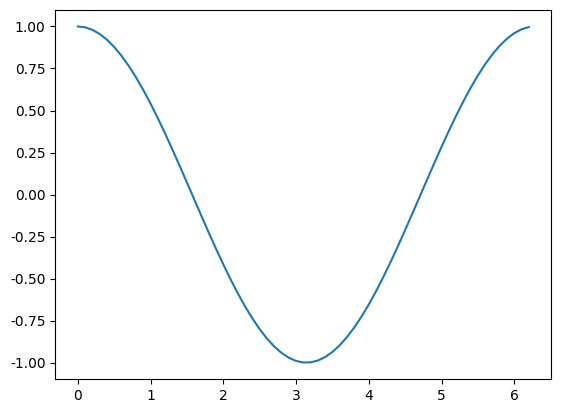

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

Cosine Similarity: 0.9922778767136677


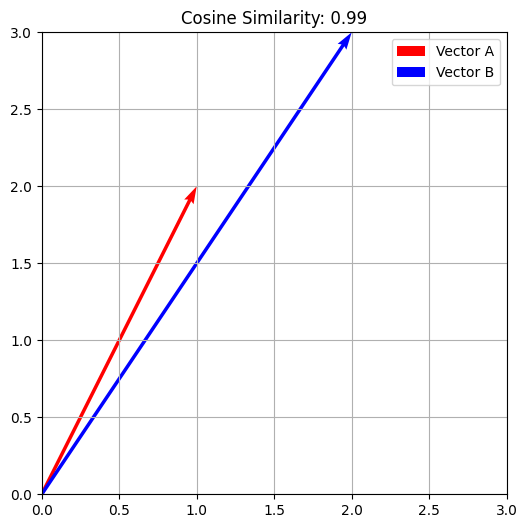

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# 벡터 A와 B
A = np.array([1, 2])
B = np.array([2, 3])

# 코사인 유사도 계산
cosine_similarity = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

# 결과 출력
print("Cosine Similarity:", cosine_similarity)

# 벡터 시각화
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# 좌표 설정
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

# 그래프 출력
plt.title(f"Cosine Similarity: {cosine_similarity:.2f}")
plt.show()


In [66]:

from sklearn.metrics.pairwise import cosine_similarity

# 벡터 A와 B
A = np.array([1, 2]).reshape(1, -1)  # reshape을 통해 2D 배열로 변환
B = np.array([2, 3]).reshape(1, -1)

# 코사인 유사도 계산
cosine_sim = cosine_similarity(A, B)

# 결과 출력
print("Cosine Similarity:", cosine_sim[0][0])


Cosine Similarity: 0.9922778767136676


In [68]:
np.array([1, 2]).reshape(1, -1)

array([[1, 2]])

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

start = len(reviews[0]) // 2 #첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
source = reviews[0][-start:] #중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성
print(start)
print(source)

2021
taining . 
i guess the bottom line with movies like this is that you should always make sure that the audience is " into it " even before they are given the secret password to enter your world of understanding . 
i mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! 
okay , we get it . . . there 
are people chasing her and we don't know who they are . 
do we really need to see it over and over again ? 
how about giving us different scenes offering further insight into all of the strangeness going down in the movie ? 
apparently , the studio took this film away from its director and chopped it up themselves , and it shows . 
there might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess " the suits " decided that turning it into a music video with little edge , would make more sense . 
the actors are pretty good for the most part , although wes bentley just seemed to be playing the ex

In [70]:
cv

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])

In [72]:
cv.transform([source])

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 88 stored elements in Compressed Sparse Row format>

In [74]:
# prompt: cv.transform([source]) 데이터프레임으로

df_source_cv = pd.DataFrame(cv.transform([source]).toarray(), columns=cv.get_feature_names_out())
df_source_cv


,film,one,movie,like,even,time,good,story,would,much,...,directing,mike,leading,ground,lies,forget,alive,baby,vampire,conclusion
0,3,0,3,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df_reviews_cv = pd.DataFrame(reviews_cv.toarray(), columns=cv.get_feature_names_out())
df_reviews_cv.head()

,film,one,movie,like,even,time,good,story,would,much,...,directing,mike,leading,ground,lies,forget,alive,baby,vampire,conclusion
0,6,3,6,3,3,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,3,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8,5,2,4,4,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,1,2,1,1,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4,2,3,2,1,4,2,1,3,0,2,...,0,0,0,0,0,0,0,0,0,1


In [77]:

source_cv = cv.transform([source]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

print("#대상 특성 행렬의 크기:", source_cv.shape) #행렬의 크기를 확인, 문서가 하나이므로 (1, 1000)

sim_result = cosine_similarity(source_cv, reviews_cv) #변환된 count vector와 기존 값들과의 similarity 계산

print("#유사도 계산 행렬의 크기:", sim_result.shape)
print("#유사도 계산결과를 역순으로 정렬:", sorted(sim_result[0], reverse=True)[:10])

#대상 특성 행렬의 크기: (1, 1000)
#유사도 계산 행렬의 크기: (1, 2000)
#유사도 계산결과를 역순으로 정렬: [0.8367205630128807, 0.43817531290756406, 0.4080451370075411, 0.40727044884302327, 0.4060219836225451, 0.3999621981759778, 0.39965783997760135, 0.39566661804603703, 0.3945302295079114, 0.3911637170821695]


In [81]:
# prompt: sim_result를 데이터프레임으로 컬럼명
#Transpose sim_result so it has 2000 rows and 1 column

df_sim_result = pd.DataFrame(sim_result.T, columns=['similarity'])

df_sim_result

,similarity
0,0.836721
1,0.296185
2,0.301195
3,0.200703
4,0.219370
...,...
1995,0.302090
1996,0.075641
1997,0.203875
1998,0.288229


In [83]:
sim_result[0]

array([0.83672056, 0.29618526, 0.3011952 , ..., 0.20387539, 0.28822896,
       0.28244066])

In [56]:
import numpy as np
print('#가장 유사한 리뷰의 인덱스:', np.argmax(sim_result[0]))

#가장 유사한 리뷰의 인덱스: 0


In [84]:
print('#가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])

#가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]


## 4.6 TF-IDF로 성능을 높여보자

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [105]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(corpus)

pd.DataFrame(X1.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [95]:

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names_out())

,and this,document is,first document,is the,is this,second document,the first,the second,the third,third one,this document,this is,this the
0,0,0,1,1,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,1,0,1,0
3,0,0,1,0,1,0,1,0,0,0,0,0,1


### corpus에서 countervector를 하여 tf-idf를 구한 값과 직접 tf-idf를 구한 값은 동일

In [97]:
tf= TfidfTransformer()
X3 = tf.fit_transform(X)

pd.DataFrame(X3.toarray(), columns=tf.get_feature_names_out())

,x0,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [107]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [106]:
# prompt: X3와 X는 같은 행렬인지 비교

# X3와 X가 같은 행렬인지 비교
are_equal = np.allclose(X3.toarray(), X.toarray())

if are_equal:
  print("X3와 X는 같은 행렬입니다.")
else:
  print("X3와 X는 다른 행렬입니다.")


X3와 X는 같은 행렬입니다.


In [100]:
X3 X

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


<4x9 sparse matrix of type '<class 'numpy.bool_'>'
	with 15 stored elements in Compressed Sparse Row format>

In [85]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [86]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

reviews_tfidf = transformer.fit_transform(reviews_cv)
print('#shape of tfidf matrix:', reviews_tfidf.shape) #TF-IDF 행렬의 모양과 카운트 행렬의 모양이 일치하는 것을 확인

#첫 리뷰의 카운트 벡터 중 앞 20개 값 출력
print('#20 count score of the first review:', reviews_cv[0].toarray()[0][:20])
#첫 리뷰의 TF-IDF 벡터 중 앞 20개 값 출력
print('#20 tfidf score of the first review:', reviews_tfidf[0].toarray()[0][:20])

#shape of tfidf matrix: (2000, 1000)
#20 count score of the first review: [6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]
#20 tfidf score of the first review: [0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.
 0.0609124  0.         0.03126552 0.         0.03242315 0.09567082
 0.06575035 0.06518293 0.03225625 0.         0.0345017  0.06863314
 0.10042383 0.16727495]


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(vocabulary=word_features)
reviews_tf = tf.fit_transform(reviews)

source_tf = tf.transform([source]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력


In [91]:
# prompt: source_tf을 데이터프레임으로

df_source_tf = pd.DataFrame(source_tf.toarray(), columns=tf.get_feature_names_out())
df_source_tf


,film,one,movie,like,even,time,good,story,would,much,...,directing,mike,leading,ground,lies,forget,alive,baby,vampire,conclusion
0,0.107573,0.0,0.119019,0.040856,0.045544,0.0,0.048336,0.0,0.04962,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:

sim_result_tf = cosine_similarity(source_tf, reviews_tf) #변환된 count vector와 기존 값들과의 similarity 계산

print('#가장 유사한 리뷰의 인덱스:', np.argmax(sim_result_tf[0]))

#가장 유사한 리뷰의 인덱스: 0


In [88]:
print('#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])
print('#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result_tf[0]).argsort()[:10])

#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1570  687  628  112 1712 1393  524 1740]
#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   0 1110 1393 1570  645  323 1143  628 1676 1391]
